In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ruptures as rpt

from time import time

## CH4 gas

In [2]:
df=pd.read_csv(r'C:\Users\Admin\Desktop\IOCL_data\06_12_2022_all_sensor_handheld\Syn_99sccm+ch4_13.5sccm_3min_6097ppm\2212060900_MOX.csv')
df.head()

,Time(sec),UH1 Vtg(V),MOX1(Ohms),UH2 Vtg(V),MOX2(Ohms),UH3 Vtg(V),MOX3(Ohms),UH4 Vtg(V),MOX4(Ohms),Ambient Temperature(degC),Ambient Humdity(%%),Ambient Pressure(hPa)
0,0.0,0.00,250000.0,0,250000,0.00,220085.5,0.00,250000.0,24.4,49.9,759.9
1,0.5,1.88,250000.0,1,250000,2.82,220025.1,2.02,250000.0,24.4,49.9,759.9
2,1.0,1.88,250000.0,1,250000,2.82,219958.3,2.02,250000.0,24.4,50.0,759.9
3,1.5,1.88,250000.0,1,250000,2.82,219905.7,2.02,250000.0,24.4,50.0,759.9
4,2.0,1.88,250000.0,1,250000,2.82,219859.1,2.02,250000.0,24.4,50.0,759.9


<AxesSubplot:xlabel='Time(sec)'>

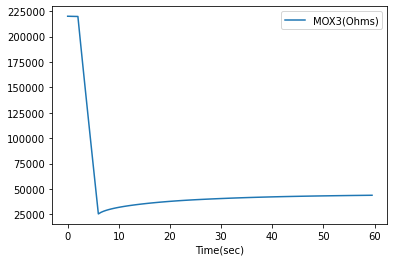

In [20]:
df[0:120].plot('Time(sec)','MOX3(Ohms)')

<AxesSubplot:xlabel='Time(sec)'>

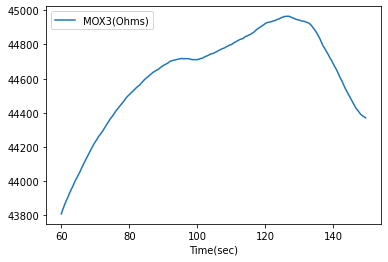

In [21]:
df[120:300].plot('Time(sec)','MOX3(Ohms)')

<AxesSubplot:xlabel='Time(sec)'>

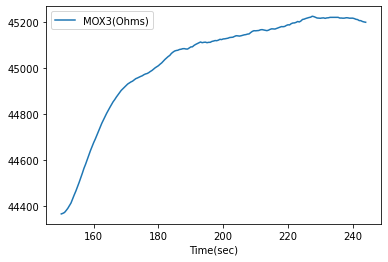

In [22]:
df[300:500].plot('Time(sec)','MOX3(Ohms)')

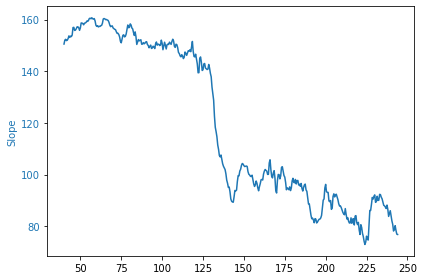

In [8]:
# Extract the relevant data from the DataFrame
x = df['Time(sec)'][80:]
y = df['MOX1(Ohms)'][80:]

# Calculate the slope at each data point using the gradient function
slope = np.gradient(y, x)

# Plot the data and the slope
import matplotlib.pyplot as plt
fig, ax1 = plt.subplots()

#color = 'tab:red'
#ax1.set_xlabel('Time(sec)')
#ax1.set_ylabel('MOX1(Ohms)', color=color)
##ax1.plot(x, y, color=color)
#ax1.tick_params(axis='y', labelcolor=color)

#ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax1.set_ylabel('Slope', color=color)
ax1.plot(x, slope, color=color)
ax1.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [6]:
data = np.array(df[['MOX1(Ohms)', 'MOX2(Ohms)', 'MOX3(Ohms)', 'MOX4(Ohms)']])
slopes = np.abs(np.gradient(data, axis=0))
slope=pd.DataFrame(slopes)
slope


<AxesSubplot:xlabel='Time(sec)'>

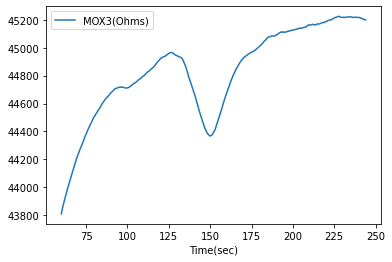

In [14]:
df[120:].plot('Time(sec)','MOX3(Ohms)')

In [12]:
import numpy as np
import matplotlib.pylab as plt
import ruptures as rpt

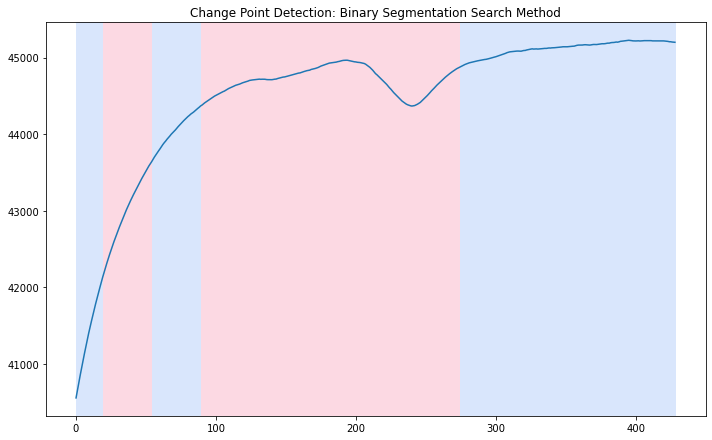

In [16]:
points=np.array(df['MOX3(Ohms)'][60:12000])
model = "l2"  
algo = rpt.Binseg(model=model).fit(points)
my_bkps = algo.predict(n_bkps=4)

rpt.show.display(points, my_bkps, figsize=(10,6))
plt.title('Change Point Detection: Binary Segmentation Search Method')
plt.show()

In [129]:
x = df["Time(sec)"][140:160]
y = df["MOX3(Ohms)"][140:160]
slope_intercept = np.polyfit(x,y,1)

print(slope_intercept)

[3.47572514e+01 4.17719815e+04]


In [134]:
x = df["Time(sec)"][360:400]
y = df["MOX3(Ohms)"][360:400]
slope_intercept = np.polyfit(x,y,1)

print(slope_intercept)

[5.18948968e+00 4.41014588e+04]


In [153]:
df.columns

Index(['Time(sec)', 'UH1 Vtg(V)', 'MOX1(Ohms)', 'UH2 Vtg(V)', 'MOX2(Ohms)',
       'UH3 Vtg(V)', 'MOX3(Ohms)', 'UH4 Vtg(V)', 'MOX4(Ohms)',
       'Ambient Temperature(degC)', 'Ambient Humdity(%%)',
       'Ambient Pressure(hPa)'],
      dtype='object')

## Feature extraction 

Slope (3554.61) not within threshold (1-15). Skipping interval 1.0
Slope (54.65) not within threshold (1-15). Skipping interval 2.0


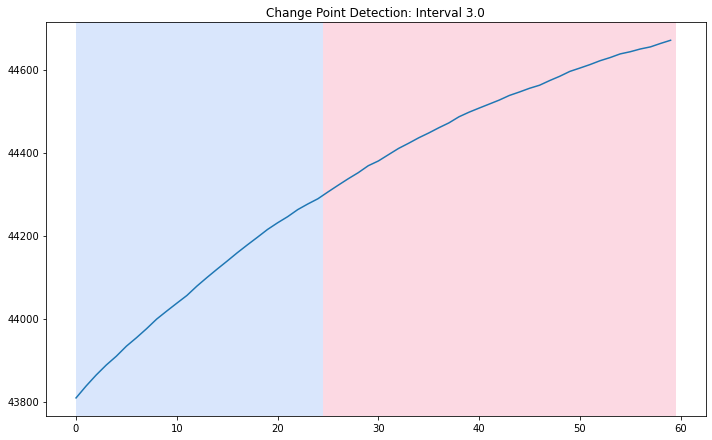

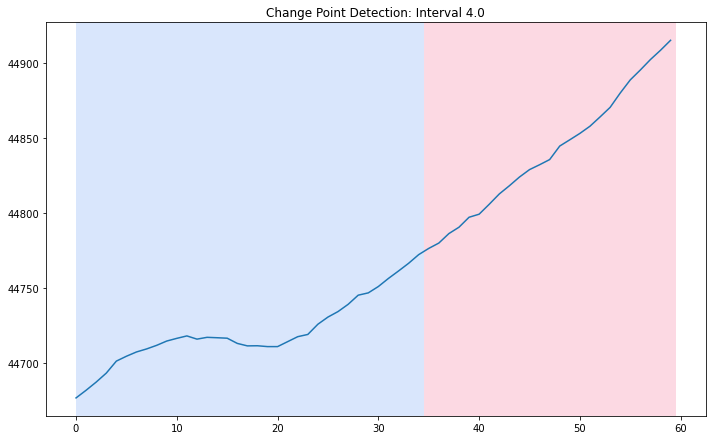

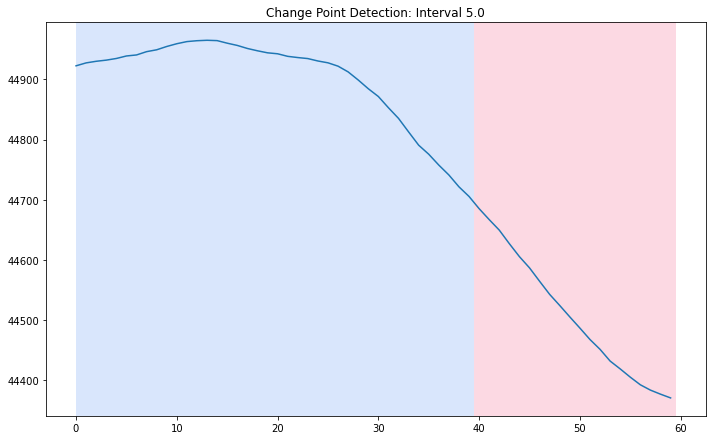

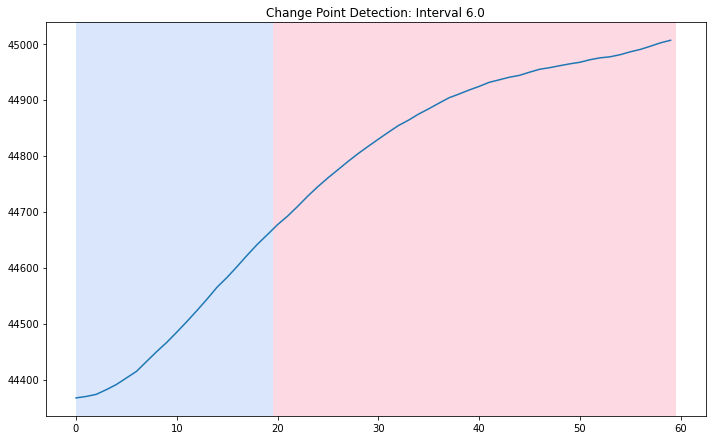

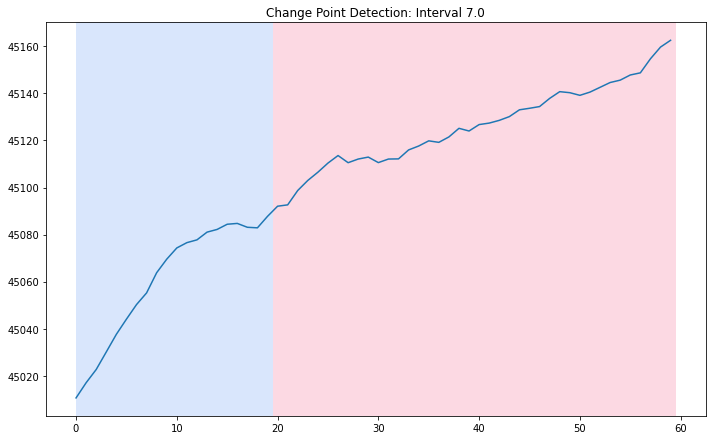

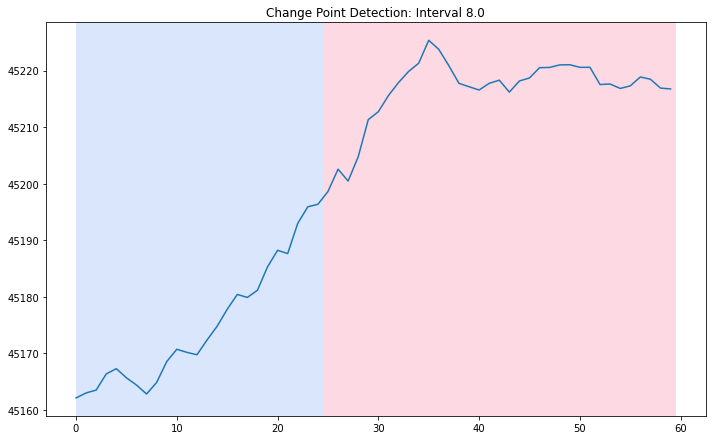

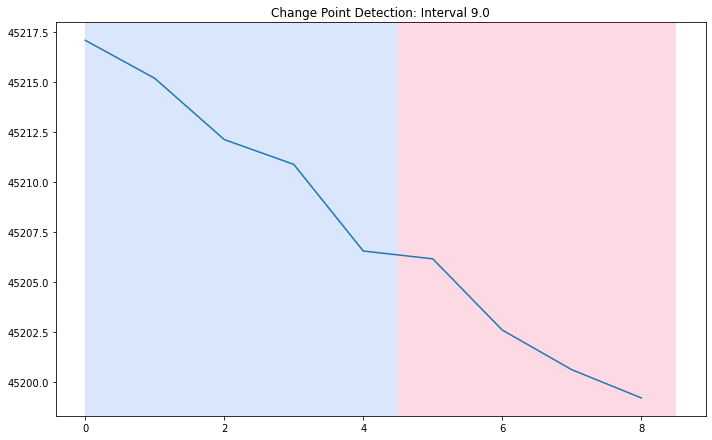

In [58]:
import numpy as np
import matplotlib.pyplot as plt
import ruptures as rpt

# Set the length of each 30-second interval-It means 60 data points from our data
interval_length = 60

# Convert the data to a numpy array
data = np.array(df['MOX3(Ohms)'])

# Initialize the starting index to 0
start_idx = 0

# Seting the threshold format in range
slope_threshold = (1,15)

# Loop through the data in 30-second intervals
while start_idx < len(data):
    #Get the end index for the current interval
    end_idx = start_idx + interval_length
    
    # Extract the current 30-second interval
    current_data = data[start_idx:end_idx]
    
    # Check if the slope between two points is within the threshold
    slope = np.abs(np.diff(current_data)).mean()
    if slope_threshold[0] <= slope <= slope_threshold[1]:
        # Fit the change point detection algorithm to the current interval
        model = "l2"
        algo = rpt.Binseg(model=model).fit(current_data)
        my_bkps = algo.predict(n_bkps=1)
        
        # Display the change point detection results
        rpt.show.display(current_data, my_bkps, figsize=(10,6))
        plt.title(f'Change Point Detection: Interval {start_idx/interval_length+1}')
        plt.show()
    else:
        print(f"Slope ({slope:.2f}) not within threshold ({slope_threshold[0]}-{slope_threshold[1]}). Skipping interval {start_idx/interval_length+1}")
    
    # Move the starting index to the beginning of the next interval
    start_idx += interval_length


## so2 gas 

In [23]:
df=pd.read_csv(r'C:\Users\Admin\Desktop\IOCL_data\1_2_2023_all_sensor_handheld_12 min expt\Syn_99sccm+so2_11 sccm_3min_5ppm\2302010696_MOX.csv')
df.head()

,Time(sec),UH1 Vtg(V),MOX1(Ohms),UH2 Vtg(V),MOX2(Ohms),UH3 Vtg(V),MOX3(Ohms),UH4 Vtg(V),MOX4(Ohms),Ambient Temperature(degC),Ambient Humdity(%%),Ambient Pressure(hPa)
0,0.0,0.00,250000.0,0,250000,0.00,209138.1,0.00,250000.0,25.4,47.3,759.9
1,0.5,1.88,250000.0,1,250000,2.82,209154.1,2.02,250000.0,25.4,47.3,759.9
2,1.0,1.88,250000.0,1,250000,2.82,209155.5,2.02,250000.0,25.5,47.4,759.9
3,1.5,1.88,250000.0,1,250000,2.82,209169.7,2.02,250000.0,25.4,47.4,759.9
4,2.0,1.88,250000.0,1,250000,2.82,209185.9,2.02,250000.0,25.4,47.3,759.9


<AxesSubplot:xlabel='Time(sec)'>

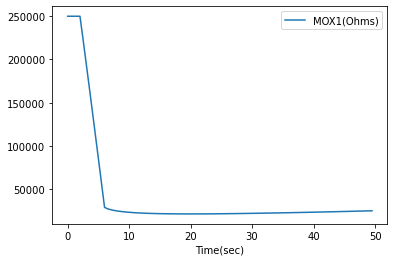

In [25]:
#Before inserting gas
df[0:100].plot('Time(sec)','MOX1(Ohms)')

<AxesSubplot:xlabel='Time(sec)'>

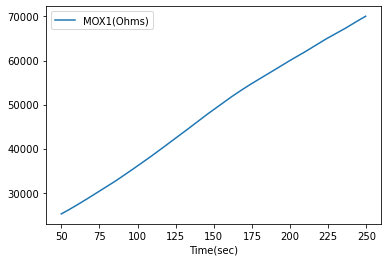

In [26]:
df[100:500].plot('Time(sec)','MOX1(Ohms)')

<AxesSubplot:xlabel='Time(sec)'>

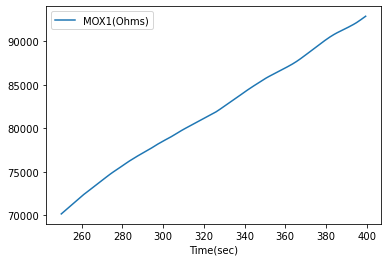

In [27]:
df[500:800].plot('Time(sec)','MOX1(Ohms)')

<AxesSubplot:xlabel='Time(sec)'>

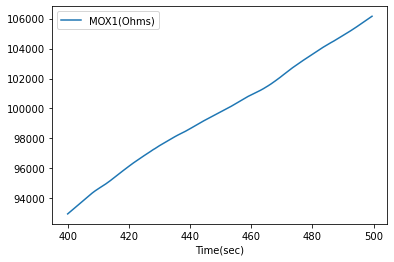

In [28]:
df[800:1000].plot('Time(sec)','MOX1(Ohms)')

## Slope vs time 

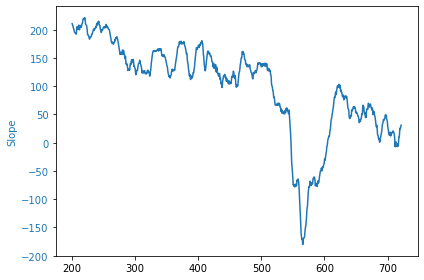

In [39]:
import numpy as np

# Extract the relevant data from the DataFrame
x = df['Time(sec)'][400:]
y = df['MOX1(Ohms)'][400:]

# Calculate the slope at each data point using the gradient function
slope = np.gradient(y, x)

# Plot the data and the slope
import matplotlib.pyplot as plt
fig, ax1 = plt.subplots()

#color = 'tab:red'
#ax1.set_xlabel('Time(sec)')
#ax1.set_ylabel('MOX1(Ohms)', color=color)
##ax1.plot(x, y, color=color)
ax1.tick_params(axis='y', labelcolor=color)

#ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax1.set_ylabel('Slope', color=color)
ax1.plot(x, slope, color=color)
ax1.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()


<AxesSubplot:xlabel='Time(sec)'>

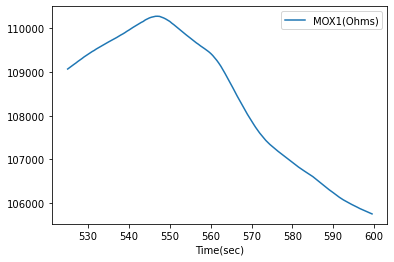

In [33]:
#After inserting a gas
df[1050:1200].plot('Time(sec)','MOX1(Ohms)')

In [29]:
#Finding the threshold
#After 1082 data points only gas is inserted so find the slope before it and while doing insertion too and hen come to the conclusion
x = df["Time(sec)"][1080:1140]
y = df["MOX1(Ohms)"][1080:1140]
slope_intercept = np.polyfit(x,y,1)

print(slope_intercept)

[-7.14176660e+01  1.49190575e+05]


## Algorithm 

Slope (-2811.56) not within threshold (65-80). Skipping interval 1.0
Slope (84.52) not within threshold (65-80). Skipping interval 2.0
Slope (108.75) not within threshold (65-80). Skipping interval 3.0
Slope (123.20) not within threshold (65-80). Skipping interval 4.0
Slope (130.84) not within threshold (65-80). Skipping interval 5.0
Slope (116.57) not within threshold (65-80). Skipping interval 6.0
Slope (103.65) not within threshold (65-80). Skipping interval 7.0
Slope (100.60) not within threshold (65-80). Skipping interval 8.0
Slope (98.81) not within threshold (65-80). Skipping interval 9.0


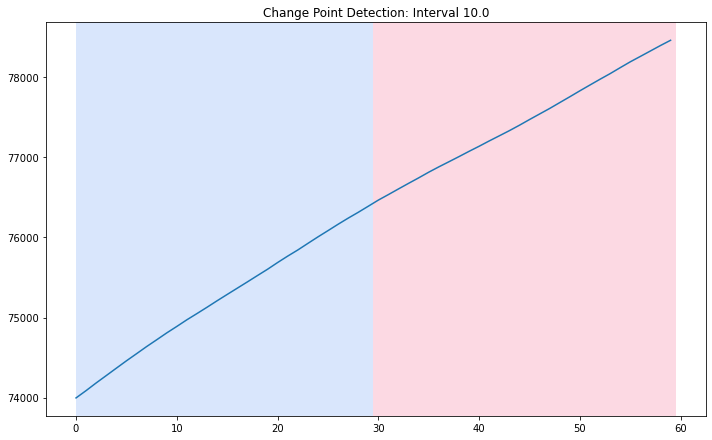

Slope (64.98) not within threshold (65-80). Skipping interval 11.0


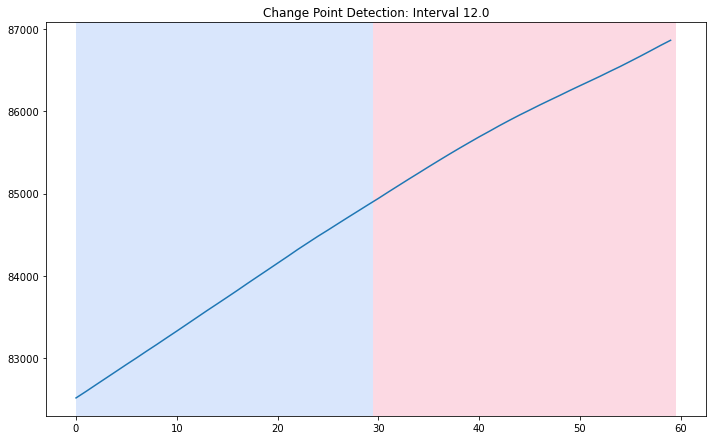

Slope (81.08) not within threshold (65-80). Skipping interval 13.0


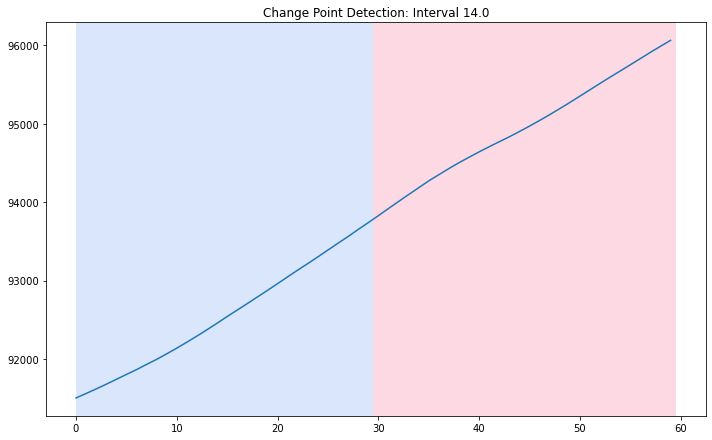

Slope (59.72) not within threshold (65-80). Skipping interval 15.0
Slope (64.38) not within threshold (65-80). Skipping interval 16.0


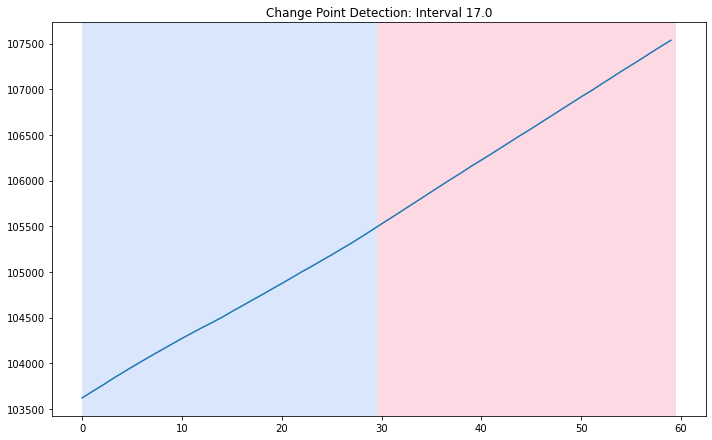

Slope (37.61) not within threshold (65-80). Skipping interval 18.0
Slope (-35.71) not within threshold (65-80). Skipping interval 19.0
Slope (-34.88) not within threshold (65-80). Skipping interval 20.0
Slope (29.79) not within threshold (65-80). Skipping interval 21.0
Slope (28.24) not within threshold (65-80). Skipping interval 22.0
Slope (24.96) not within threshold (65-80). Skipping interval 23.0
Slope (10.19) not within threshold (65-80). Skipping interval 24.0
Slope (13.93) not within threshold (65-80). Skipping interval 25.0


In [7]:
import numpy as np
import matplotlib.pyplot as plt
import ruptures as rpt
from sklearn.linear_model import LinearRegression

# Set the length of each 30-second interval-It means 60 data points from our data
interval_length = 60

# Convert the data to a numpy array
data = np.array(df['MOX1(Ohms)'])

# Initialize the starting index to 0
start_idx = 0

# Seting the threshold format in range
slope_threshold = (65,80)

# Loop through the data in 30-second intervals
while start_idx < len(data):
    #Get the end index for the current interval
    end_idx = start_idx + interval_length #---0+60
    
    # Extract the current 30-second interval
    current_data = data[start_idx:end_idx]#---[0:60]
    
    # Check if the slope between two points is within the threshold
    #Different formula for slope
    x = np.arange(len(current_data))
    y = current_data
    coefficients = np.polyfit(x, y, 1)
    slope = coefficients[0]
    if slope_threshold[0] <= slope <= slope_threshold[1]:
        # Fit the change point detection algorithm to the current interval
        model = "l2"
        algo = rpt.Binseg(model=model).fit(current_data)
        my_bkps = algo.predict(n_bkps=1)
        
        # Display the change point detection results
        rpt.show.display(current_data, my_bkps, figsize=(10,6))
        plt.title(f'Change Point Detection: Interval {start_idx/interval_length+1}')
        plt.show()
    else:
        print(f"Slope ({slope:.2f}) not within threshold ({slope_threshold[0]}-{slope_threshold[1]}). Skipping interval {start_idx/interval_length+1}")
    
    # Move the starting index to the beginning of the next interval
    start_idx +=interval_length 


Slope (-2811.56) not within threshold (15-80). Skipping interval 1.0166666666666666
Slope (85.31) not within threshold (15-80). Skipping interval 2.033333333333333
Slope (109.14) not within threshold (15-80). Skipping interval 3.05
Slope (123.80) not within threshold (15-80). Skipping interval 4.066666666666666
Slope (130.74) not within threshold (15-80). Skipping interval 5.083333333333333
Slope (114.33) not within threshold (15-80). Skipping interval 6.1
Slope (103.18) not within threshold (15-80). Skipping interval 7.116666666666666
Slope (100.00) not within threshold (15-80). Skipping interval 8.133333333333333
Slope (96.64) not within threshold (15-80). Skipping interval 9.15


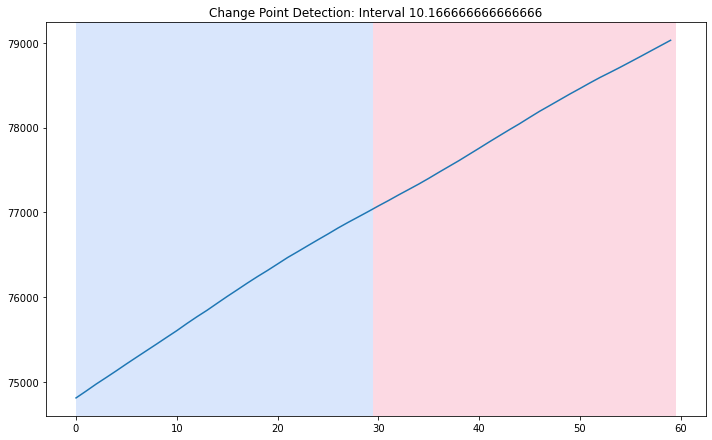

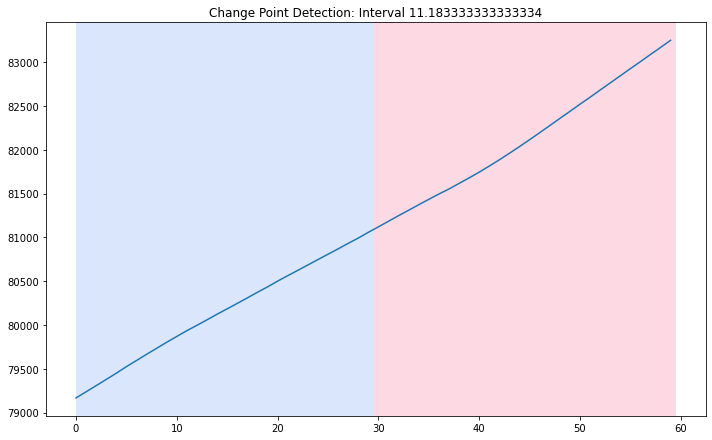

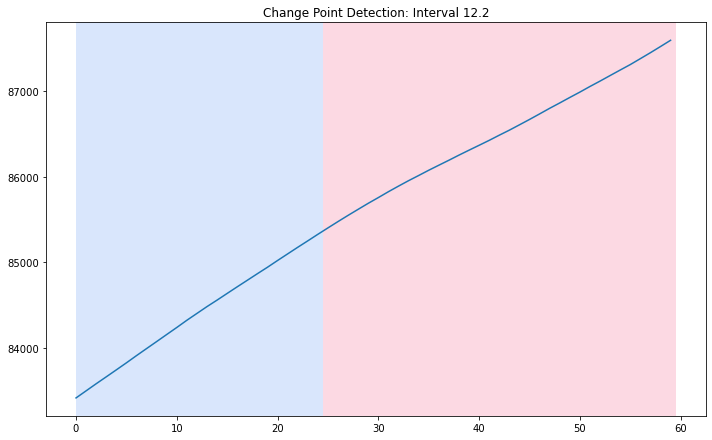

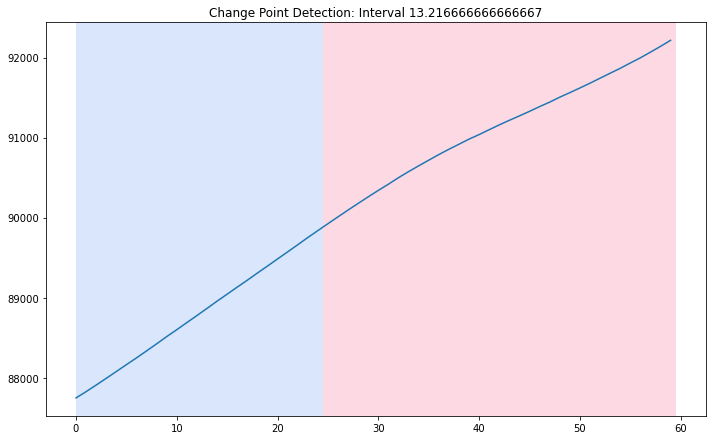

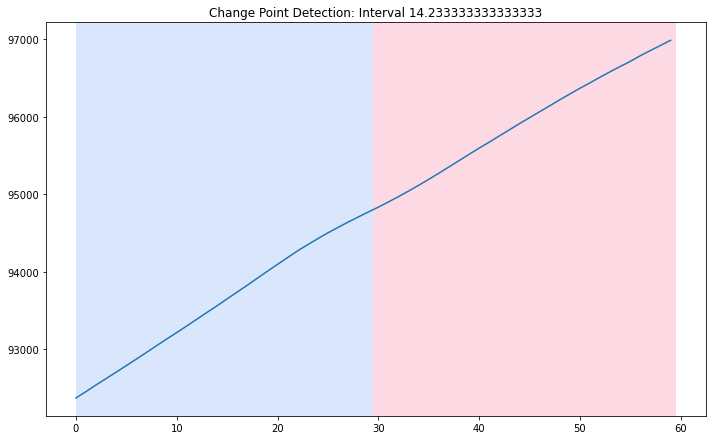

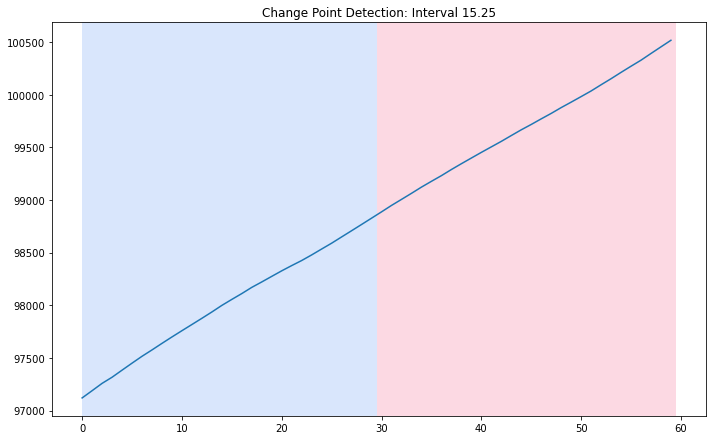

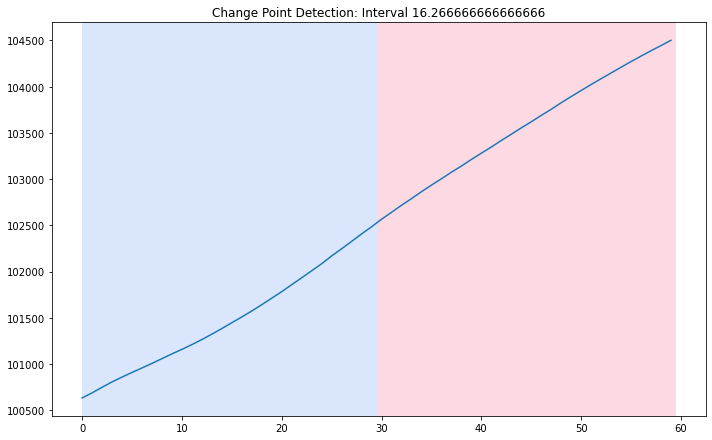

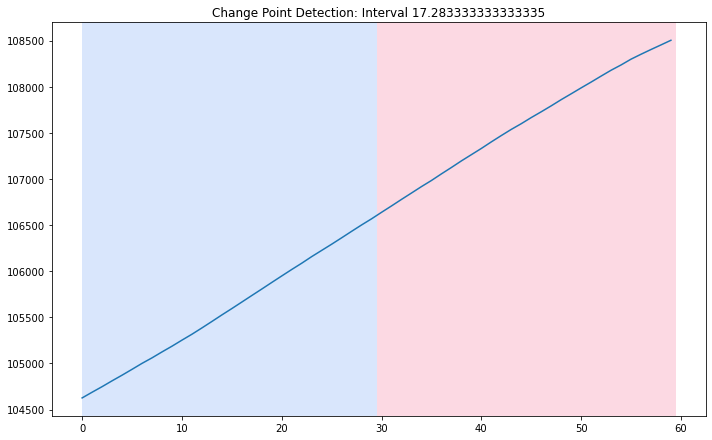

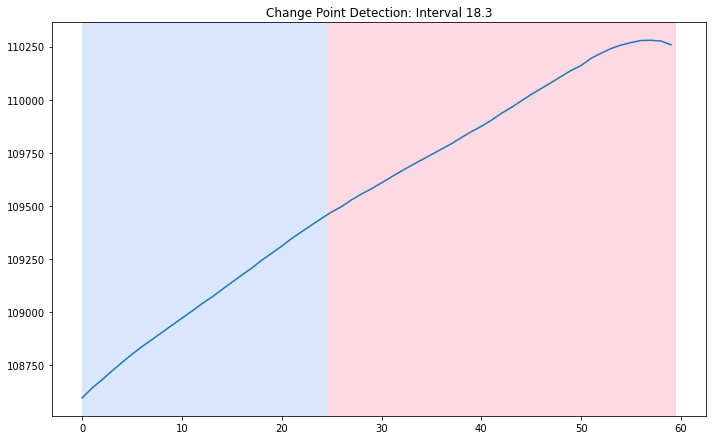

Slope (-59.76) not within threshold (15-80). Skipping interval 19.316666666666666
Slope (-23.83) not within threshold (15-80). Skipping interval 20.333333333333332


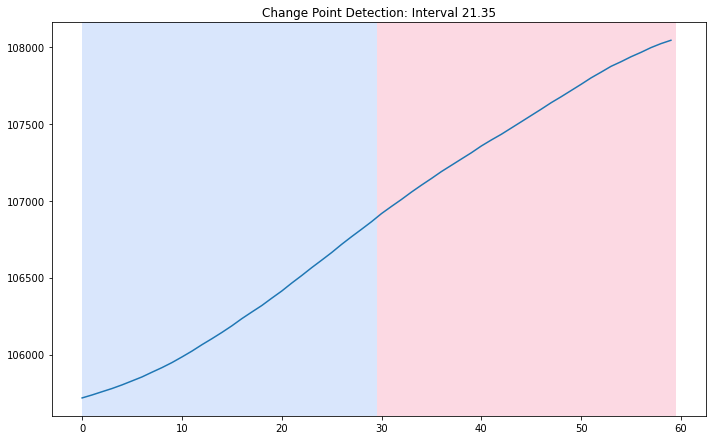

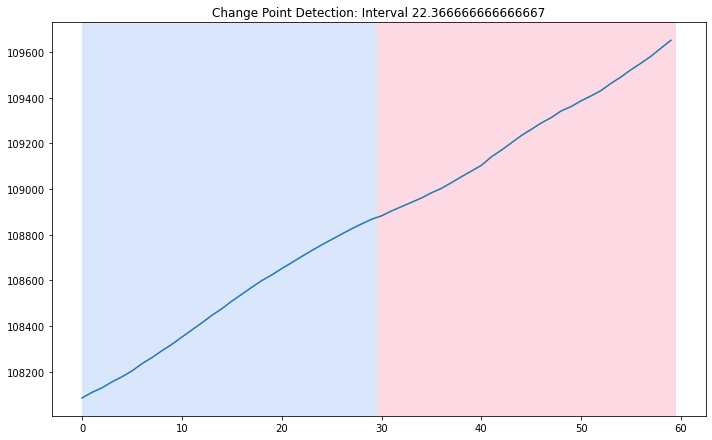

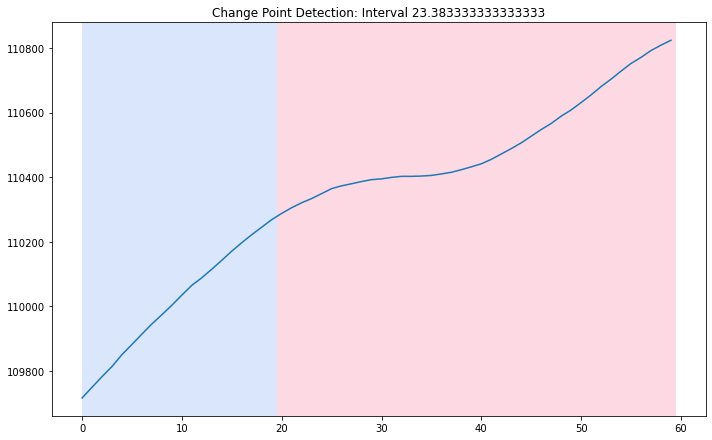

Slope (4.35) not within threshold (15-80). Skipping interval 24.4


In [13]:
import numpy as np
import matplotlib.pyplot as plt
import ruptures as rpt
from sklearn.linear_model import LinearRegression

# Set the length of each 30-second interval-It means 60 data points from our data
interval_length = 60

# Convert the data to a numpy array
data = np.array(df['MOX1(Ohms)'])

# Initialize the starting index to 0
start_idx = 0

# Seting the threshold format in range
slope_threshold = (15,80)

# Loop through the data in 30-second intervals
while start_idx < len(data):
    #Get the end index for the current interval
    
    end_idx = start_idx + interval_length - 1
    current_data = data[start_idx:end_idx+1]
    start_idx += 1

    
    
    # Check if the slope between two points is within the threshold
    #Different formula for slope
    x = np.arange(len(current_data))
    y = current_data
    coefficients = np.polyfit(x, y, 1)
    slope = coefficients[0]
    if slope_threshold[0] <= slope <= slope_threshold[1]:
        # Fit the change point detection algorithm to the current interval
        model = "l2"
        algo = rpt.Binseg(model=model).fit(current_data.reshape(-1, 1))
        my_bkps = algo.predict(n_bkps=1)
        
        # Display the change point detection results
        rpt.show.display(current_data, my_bkps, figsize=(10,6))
        plt.title(f'Change Point Detection: Interval {start_idx/interval_length+1}')
        plt.show()
    else:
        print(f"Slope ({slope:.2f}) not within threshold ({slope_threshold[0]}-{slope_threshold[1]}). Skipping interval {start_idx/interval_length+1}")
    
    # Move the starting index to the beginning of the next interval
    start_idx +=interval_length


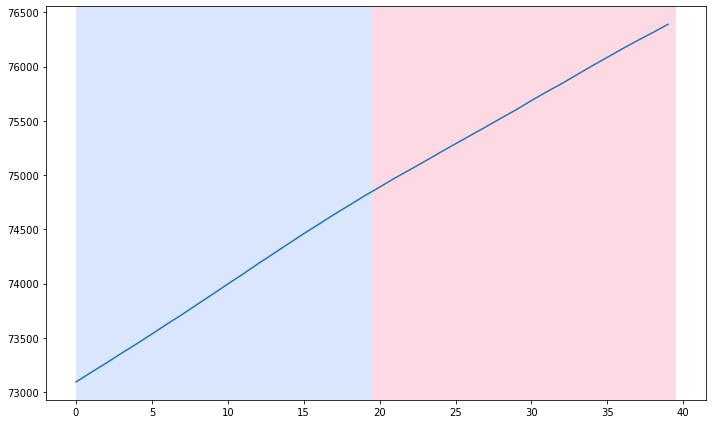

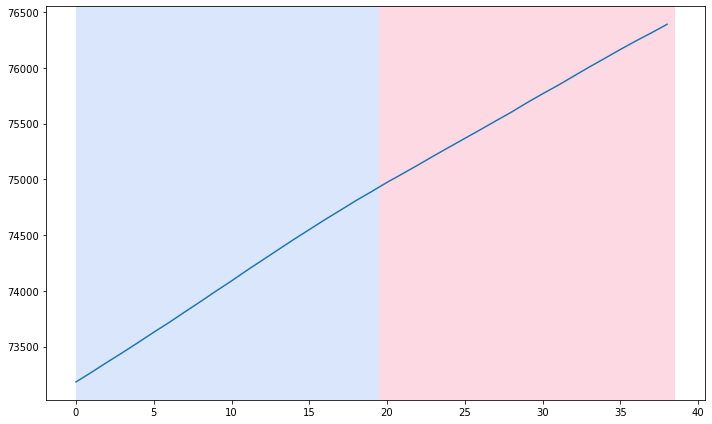

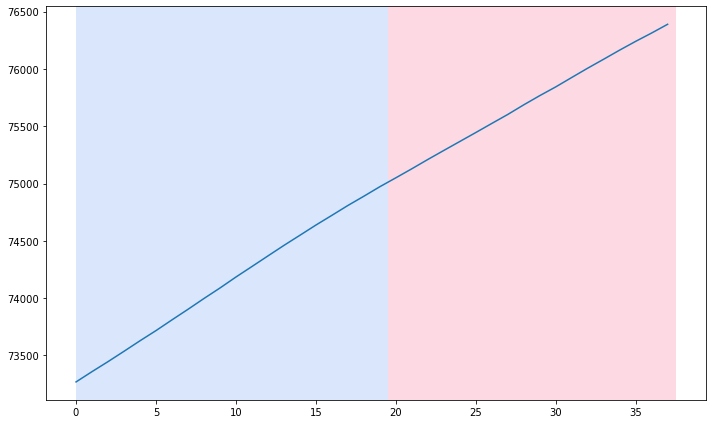

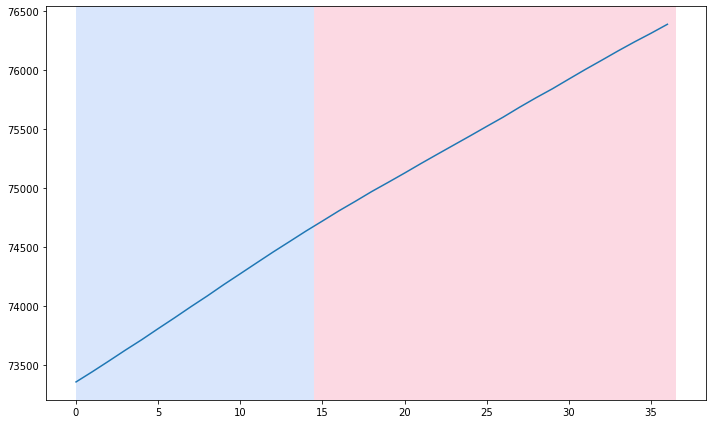

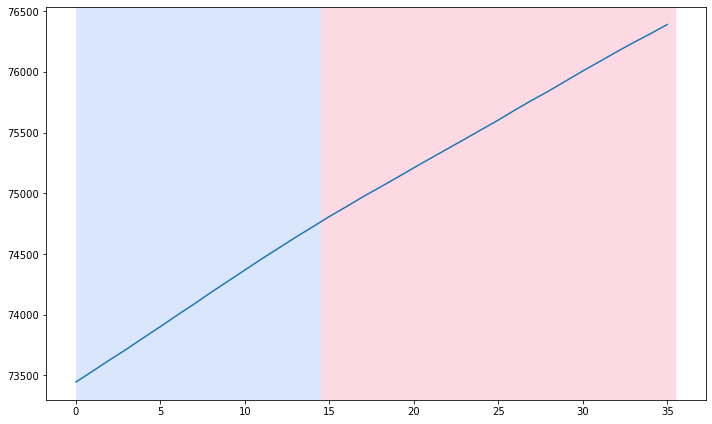

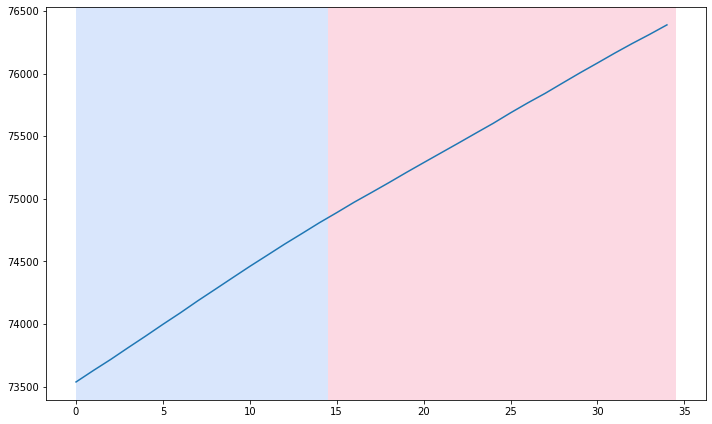

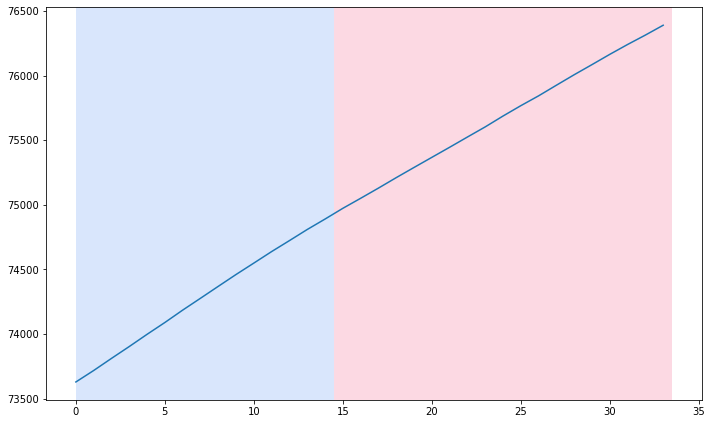

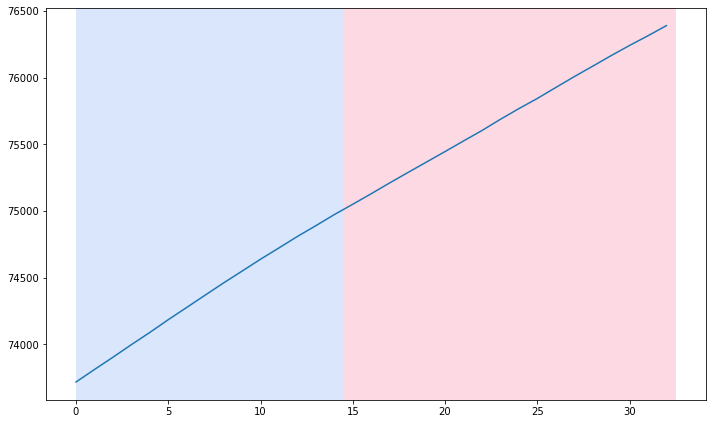

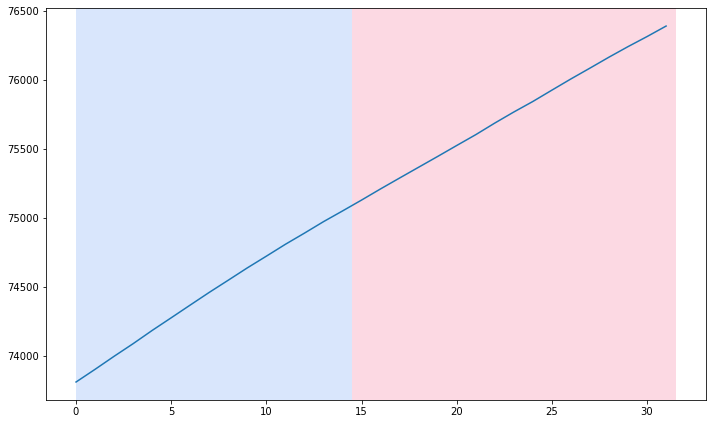

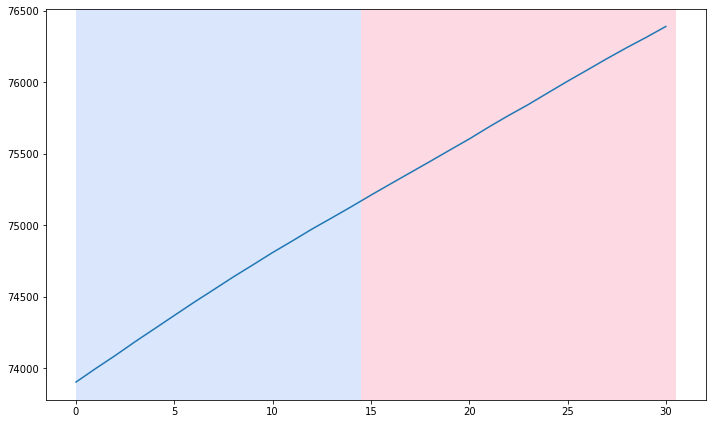

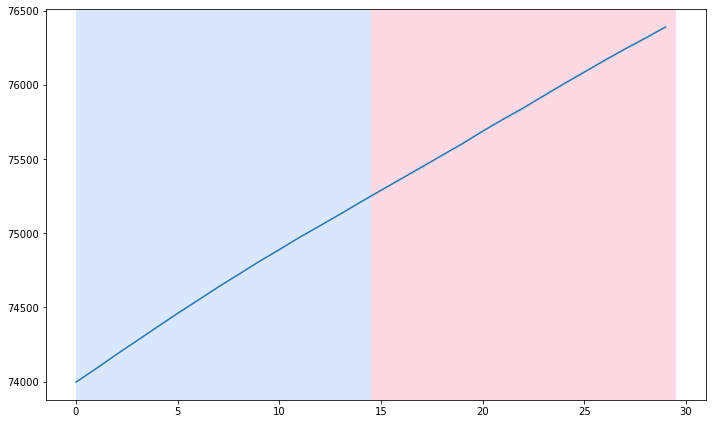

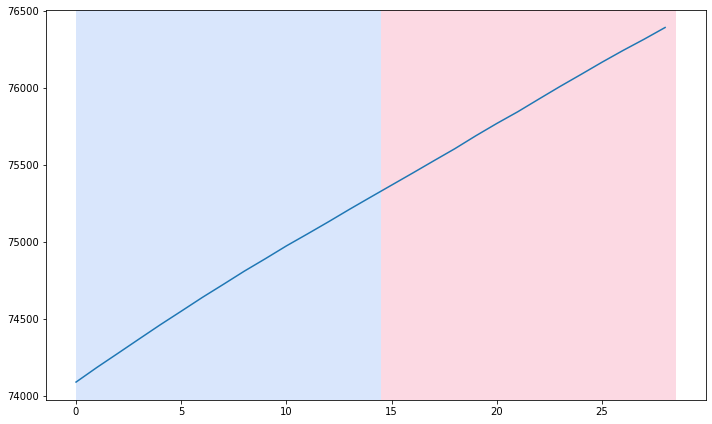

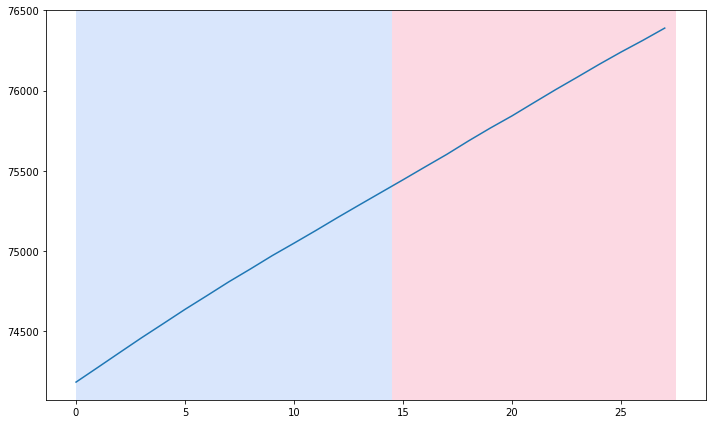

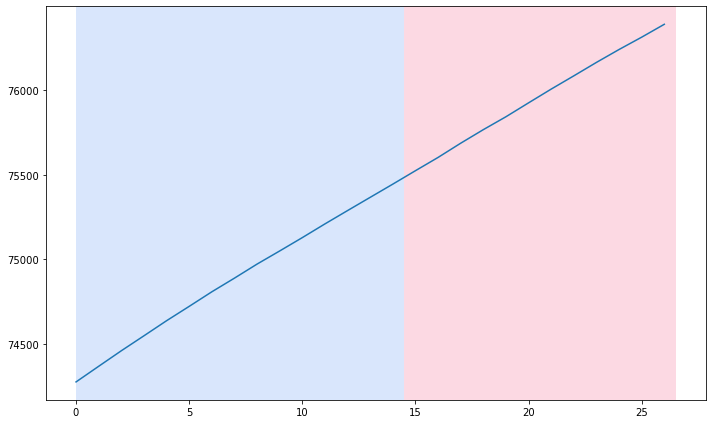

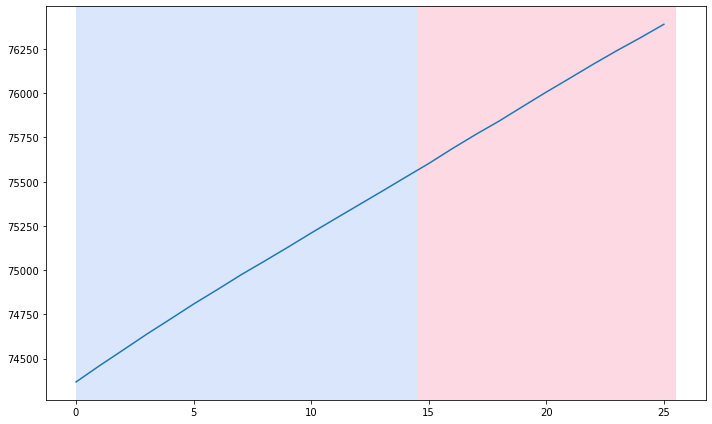

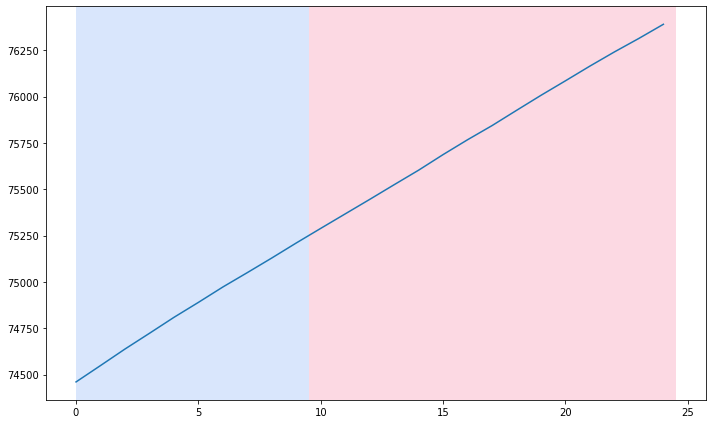

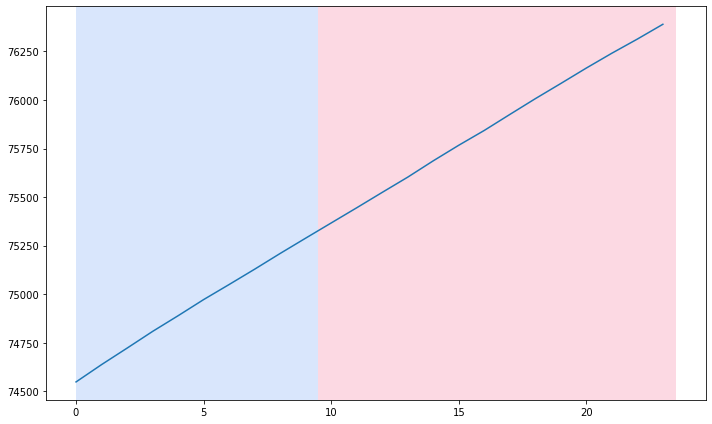

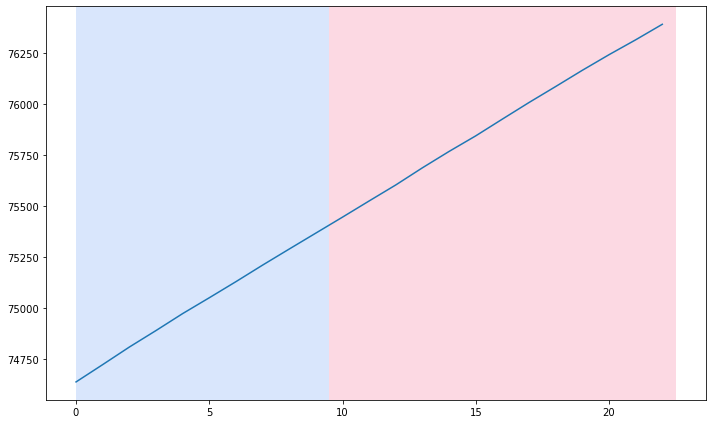

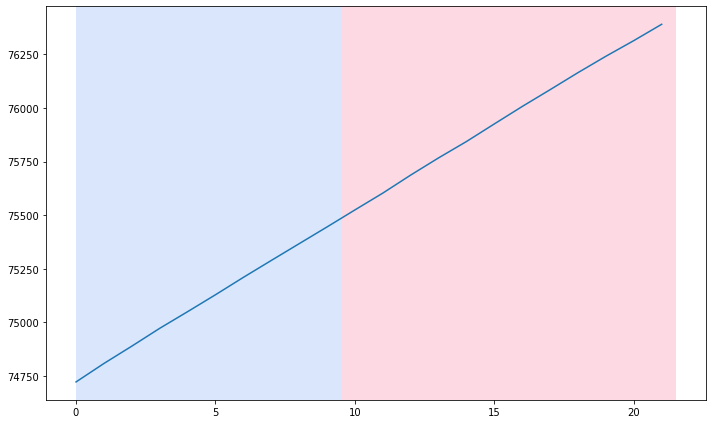

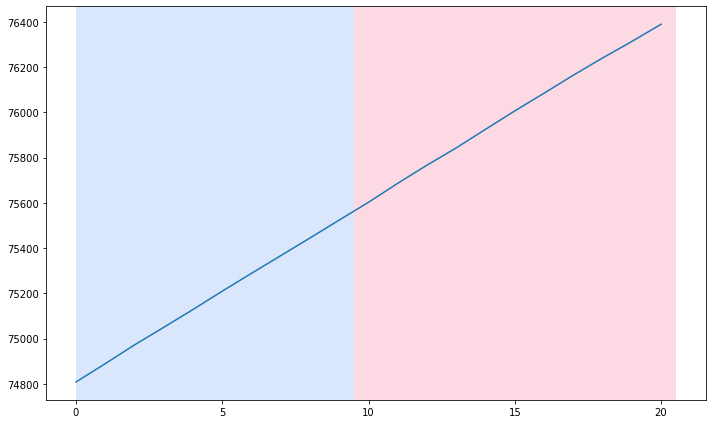

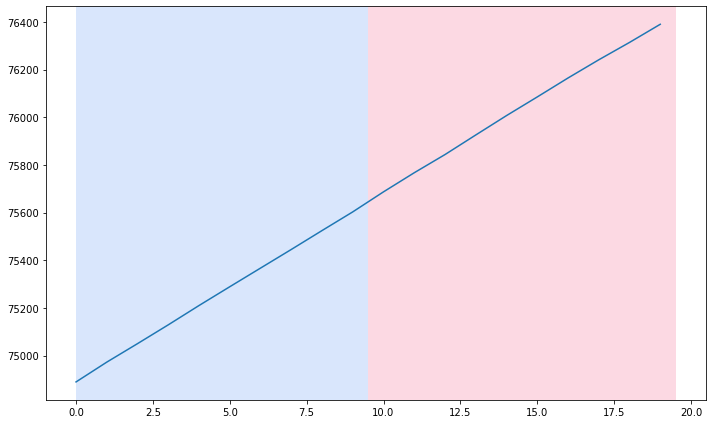

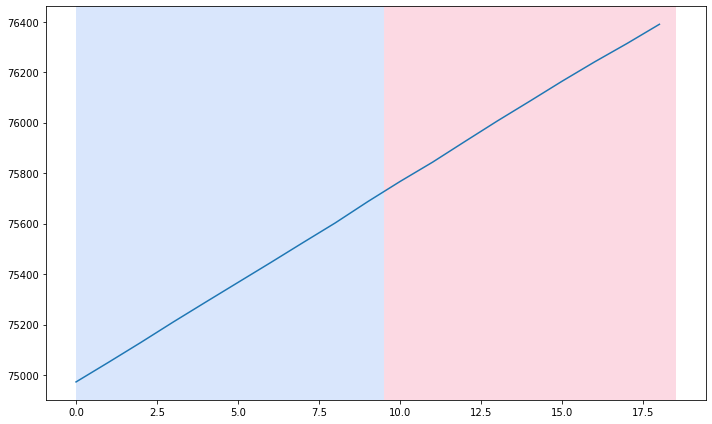

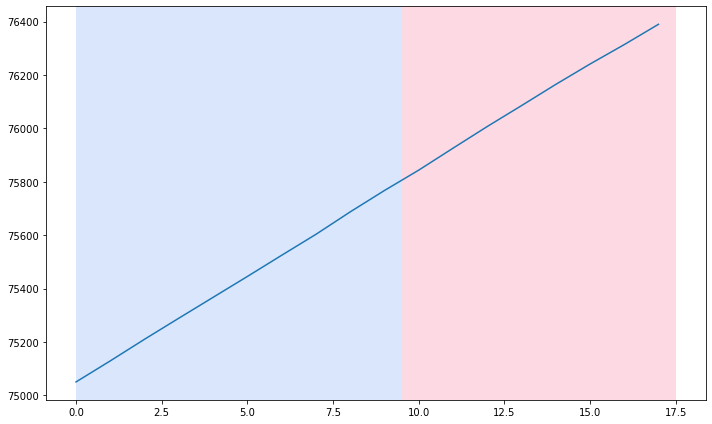

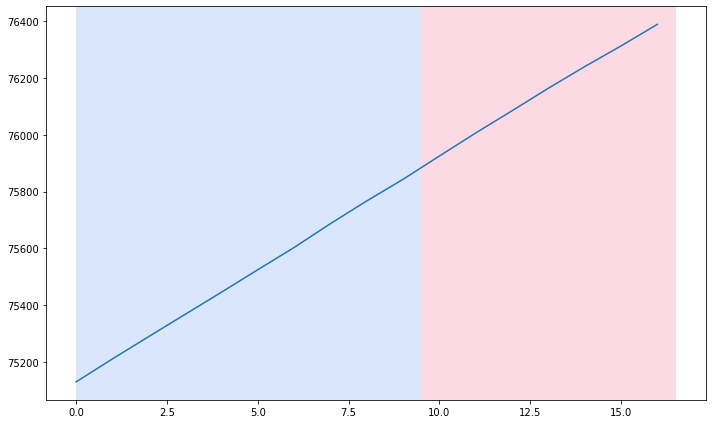

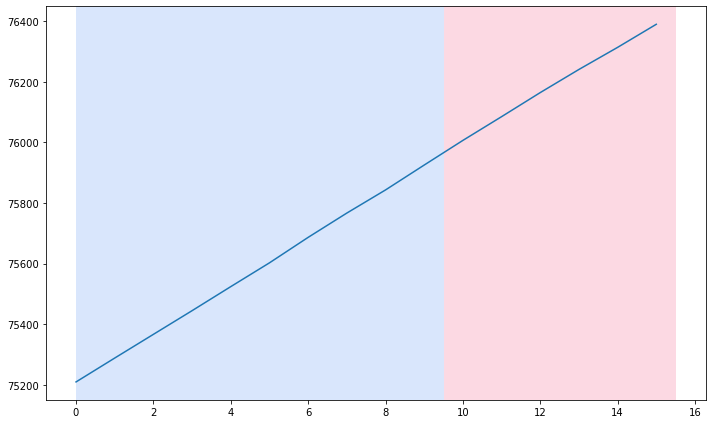

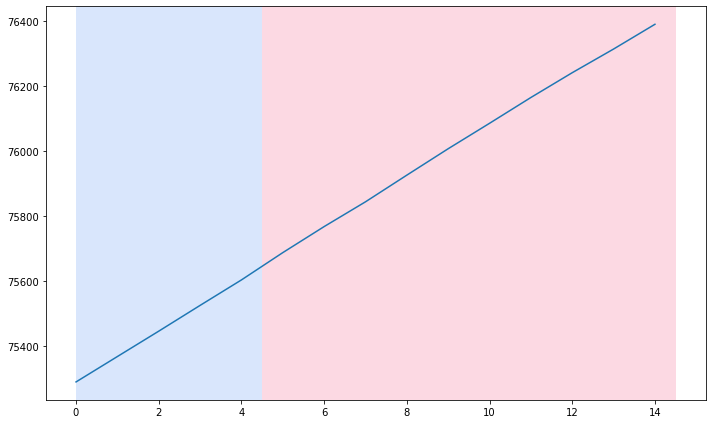

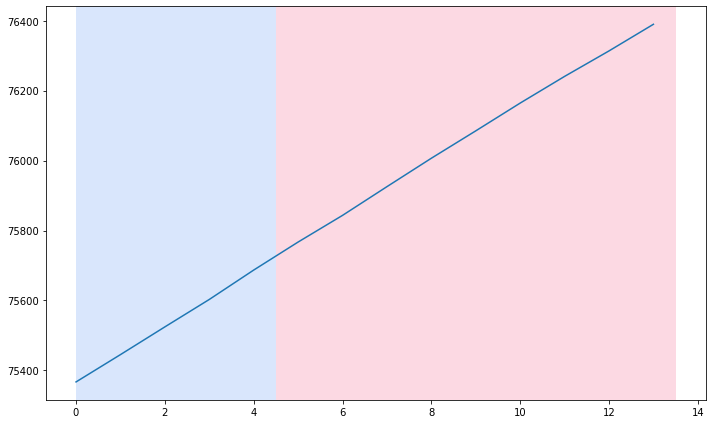

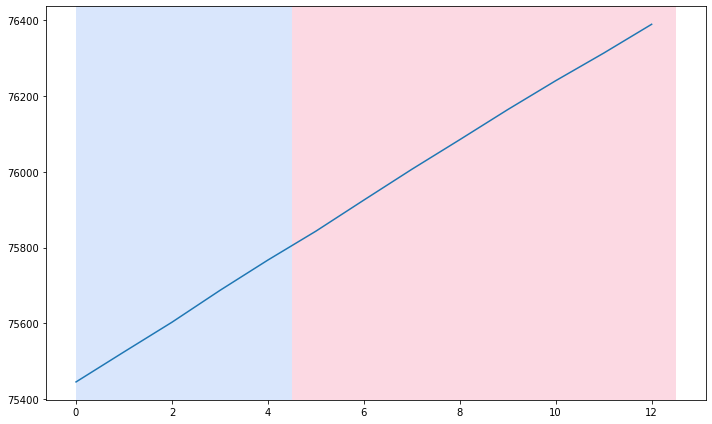

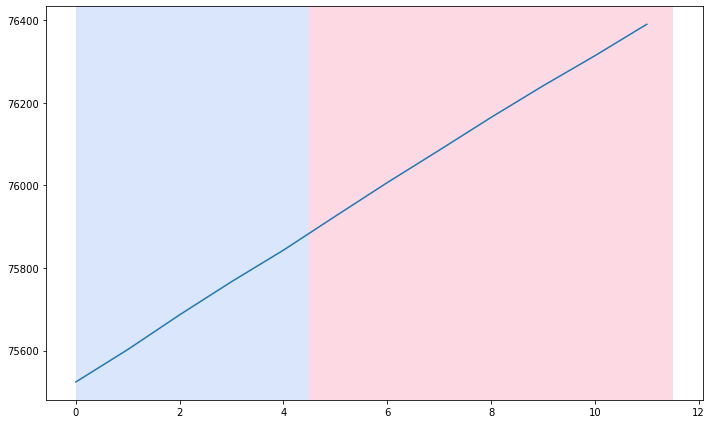

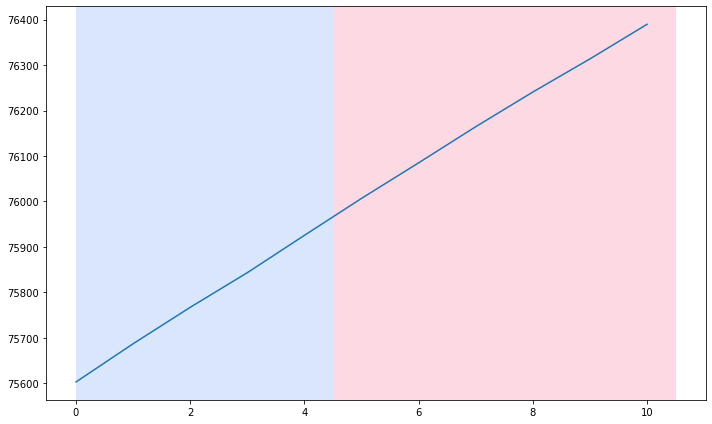

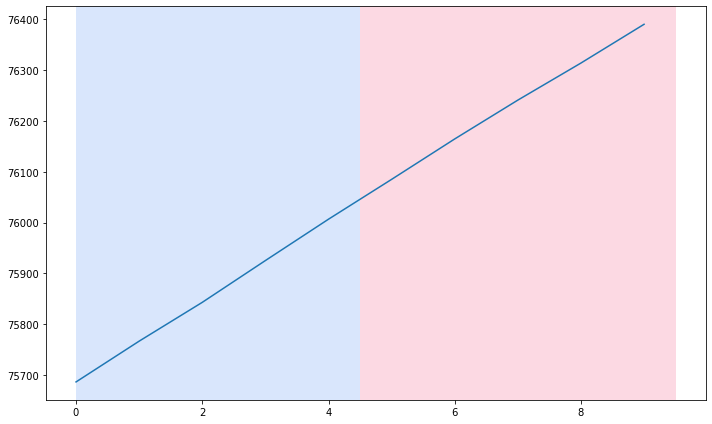

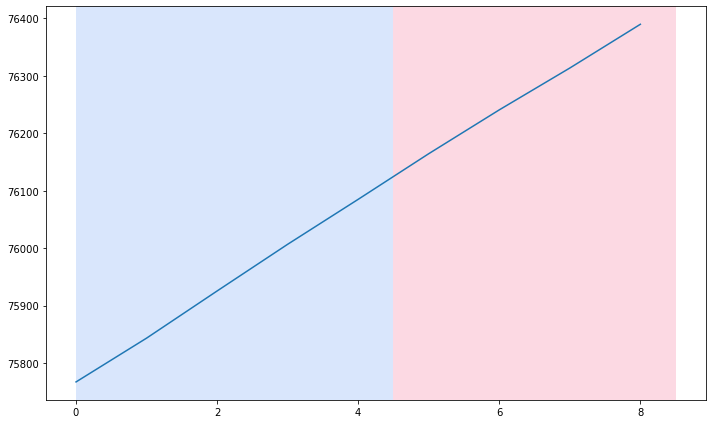

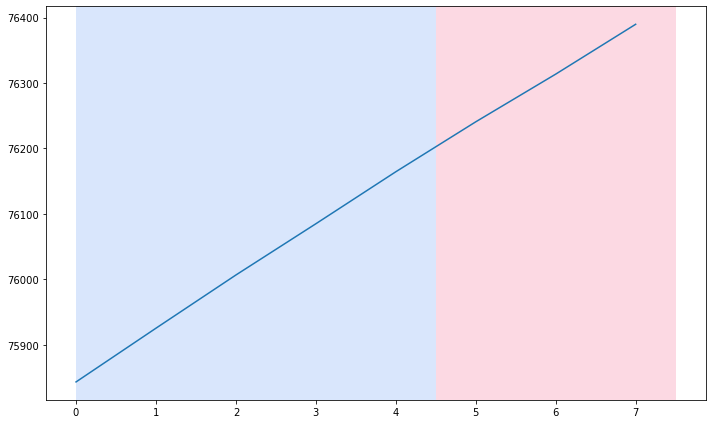

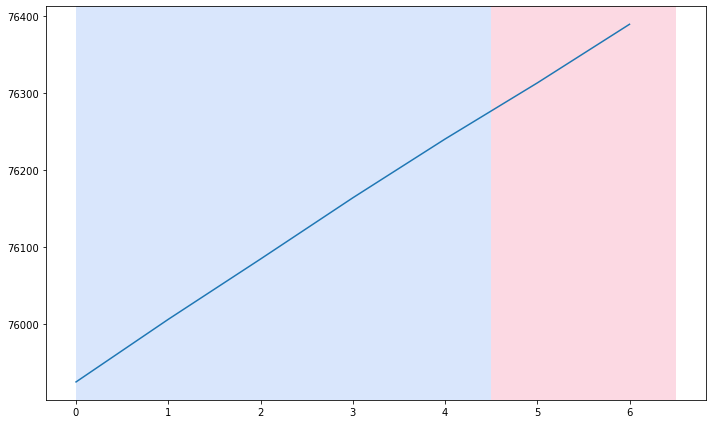

BadSegmentationParameters: 

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import ruptures as rpt

# Set the length of each 30-second interval-It means 60 data points from our data
interval_length = 60

# Convert the data to a numpy array
data = np.array(df['MOX1(Ohms)'][530:570])

# Initialize the starting index to 0
start_idx = 0

# Seting the threshold format in range
slope_threshold = (20,91)

# Loop through the data in 30-second intervals
while start_idx < len(data):
    #Get the end index for the current interval
    end_idx = start_idx + interval_length #---0+60
    
    # Extract the current 30-second interval
    current_data = data[start_idx:end_idx]#---[0:60]
    
    # Check if the slope between two points is within the threshold
    slope = np.abs(np.diff(current_data)).mean()
    #np.diff(current_data)--1,2,3=-1,-1---n converts into n-1
    #From the current_data range giving  ,,it will be finding out mean for every sec
    
    if slope_threshold[0] <= slope <= slope_threshold[1]:# Checking on range whether it lies or not
        
        # Fit the change point detection algorithm to the current interval
        model = "l2"
        algo = rpt.Binseg(model=model).fit(current_data)
        my_bkps = algo.predict(n_bkps=1)#More-Minumum --Before 1 to 5 safe
        
        # Display the change point detection results
        rpt.show.display(current_data, my_bkps, figsize=(10,6))
        plt.show()
    else:
        print(f"Slope ({slope:.2f}) not within threshold ({slope_threshold[0]}-{slope_threshold[1]}). Skipping interval {start_idx/interval_length+1}")
    
    # Move the starting index to the beginning of the next interval
    start_idx += 1


In [ ]:
# Set the number of consecutive slopes to check
consecutive_slopes = 10

# Initialize a counter for consecutive slope changes
slope_change_count = 0

# Loop through the data in 30-second intervals
while start_idx < len(data):
    # Get the end index for the current interval
    end_idx = start_idx + interval_length 
    # Extract the current 30-second interval for all 4 sensors
    current_data = data[start_idx:end_idx, :]
    # Calculate the slopes for each sensor
    slopes = np.abs(np.gradient(current_data, axis=0))
   
    # Check for 10 consecutive slope changes
    for i in range(1, len(slopes)):
        if np.any(np.abs(slopes[i] - slopes[i-1]) > slope_threshold):
            slope_change_count += 1
            if slope_change_count >= consecutive_slopes:
                # Fit the change point detection algorithm to the current interval
                print("Change point detected")
                print(slopes)
                slope_change_count = 0 # Reset the counter
                break
        else:
            slope_change_count = 0 # Reset the counter
    
    # Move the starting index to the beginning of the next interval
    start_idx += 1